# Lending Club Case Study
### Group_Facilitator_Siddakka_Kumarguru
## Business Understanding
   **You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:**
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
<img src = "C:\Users\SID\Downloads\UpGrad_Assignments\Lending Club Case Study\Loan_DataSet.JPG">

  **When a person applies for a loan, there are two types of decisions that could be taken by the company:**

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
  **This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.**
- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [12]:
# Loading required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

### Loading and Extracting the loan zip file

In [13]:
# importing the zipfil elibrary required to extract and read the zip file
import zipfile as zf
filename= 'loan.zip'
loan = zf.ZipFile(filename,'r')
# extracting the files using 'extracall' method
print(loan.printdir()) 
loan.extractall()

File Name                                             Modified             Size
loan.csv                                       2017-05-16 14:10:10     34813575
None


In [14]:
#Creating the dataframe by using the csv file present in the zip file
df = pd.read_csv(loan.open('loan.csv'),low_memory=False, parse_dates=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [15]:
#Checking the shape of the dataframe
df.shape

(39717, 111)

In [16]:
# We observed that there are more then 100 columns present in our dataframe
#Lets use set_option to display all the columns of df
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [17]:
# Checking the detailed of the data frame to know null/or empty values
df.info(max_cols=111, memory_usage='deep',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

#### There are many columns in the data farme are having all null values and are not useful for further data analysis
  **lets do the data cleaning to format and standardize the data frame**

In [18]:
# Lets drop the columns of the df having all null values
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)
print(df.shape)
df.head()

(39717, 54)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
# Checking the null values of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
# Lets reset the row index from default to id
df.set_index(['id'],inplace=True)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
# Lets drop the irrelevent columns to get proper and structured data frame for analysis
# I am dropping the columns because the values of the column or either "0" or same
df.drop(['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True, axis=1)
print(df.shape)

(39717, 42)


### Standardization and data formating of columns having %

In [22]:
# Lets replace special character and convert interest rate to float
df.int_rate = df.int_rate.apply(lambda x: x.replace("%", ""))
df['int_rate']=df['int_rate'].astype(float) 
df.revol_util = df.int_rate.astype(str) 
df.revol_util = df.revol_util.apply(lambda x: x.replace("%", ""))
df.int_rate = df.int_rate.astype(float) 
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


### Lets do the Loan similarity distribution
- What amount of loan has been issued
- What is frequency distribution loan over a period

Text(0.5, 1.0, 'No. Of installments of the loan payment in months')

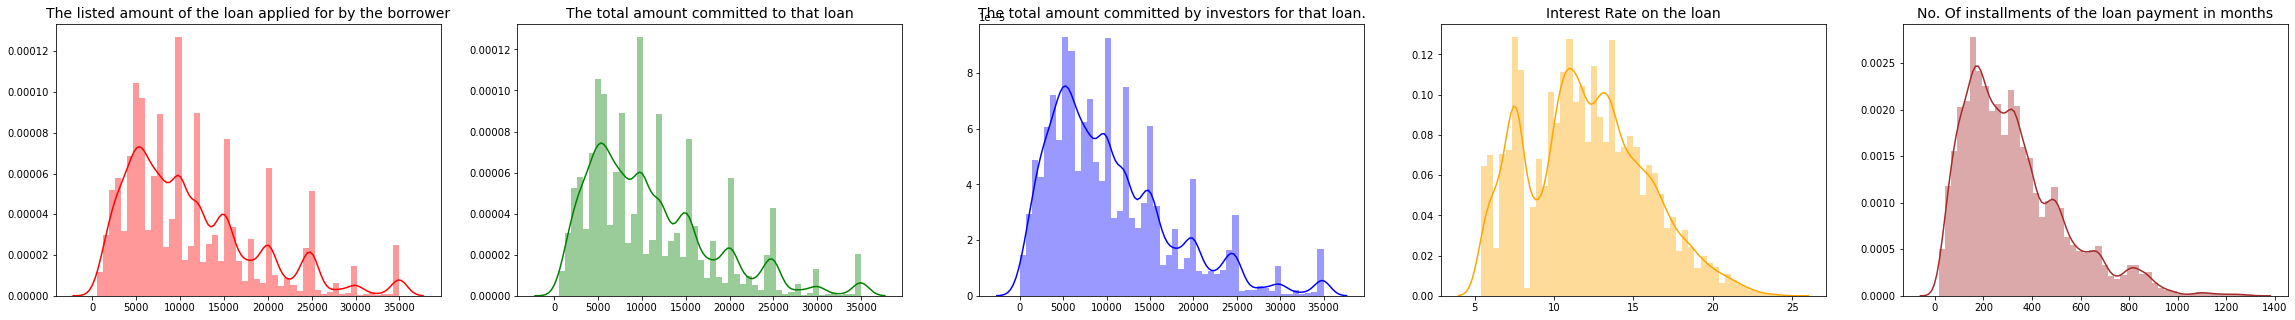

In [23]:
# Lets create the subsets to plot the distribution of loan amount
Loan_Amount = df.loan_amnt.values
Funded_Amount= df.funded_amnt.values
Investor_Amount= df.funded_amnt_inv.values
Interest_Rate =df.int_rate.values
No_Of_Installment= df.installment.values

fig, ax = plt.subplots(1, 5, figsize=(40,5))

# Lets draw the distribution plot for the above subsets
sns.distplot(Loan_Amount, ax=ax[0], color='red')
sns.distplot(Funded_Amount, ax=ax[1], color='green')
sns.distplot(Investor_Amount, ax=ax[2], color='blue')
sns.distplot(Interest_Rate, ax=ax[3], color='orange')
sns.distplot(No_Of_Installment, ax=ax[4], color='brown')

# Lets set the title for each plots
ax[0].set_title("The listed amount of the loan applied for by the borrower", fontsize=14)
ax[1].set_title("The total amount committed to that loan", fontsize=14)
ax[2].set_title("The total amount committed by investors for that loan.", fontsize=14)
ax[3].set_title("Interest Rate on the loan", fontsize=14)
ax[4].set_title("No. Of installments of the loan payment in months", fontsize=14)

In [24]:
# Creating a new column to extract primary sector of investment from category_list
df['Loan_Month']= df.issue_d.str.split('-').str[0].str.upper()
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Loan_Month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,10.65,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,DEC
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,15.27,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,DEC
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,15.96,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,DEC
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,13.49,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,DEC
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,12.69,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,DEC


Text(0, 0.5, 'Average loan amount issued')

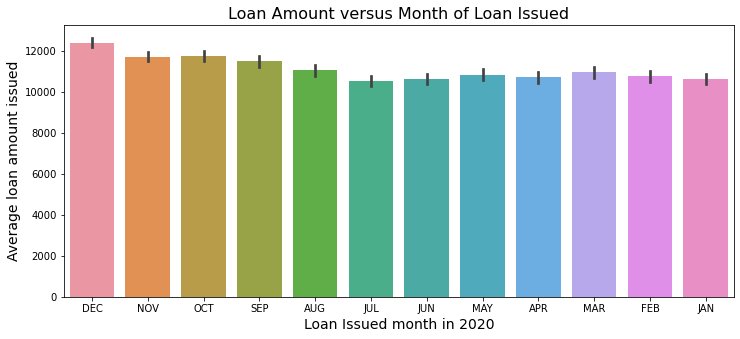

In [25]:
# Lets draw a plot a bar graph to see the loan amount vs Year of Loan Issued
plt.figure(figsize=(12,5))
sns.barplot('Loan_Month', 'loan_amnt', data=df)
plt.title('Loan Amount versus Month of Loan Issued', fontsize=16)
plt.xlabel('Loan Issued month in 2020', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

## Good Loan vs Bad Loans
  **Lets see the no. of Bad loans in Dataframe to find out the risk of load falling into default category.**

In [26]:
# Lets check the status of the loans given by Lending club
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

[Text(0.5, 0, '( Month of Loan Issued)')]

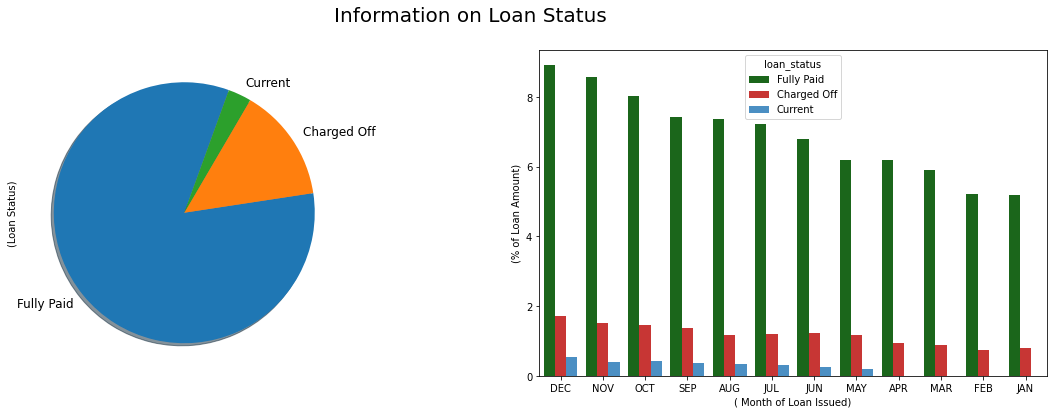

In [27]:
# Plotting the Loan status chart check the % of the Loan Status
f, ax = plt.subplots(1,2, figsize=(20,6))
# Plotting Pie chart
plt.suptitle('Information on Loan Status', fontsize=20)
df["loan_status"].value_counts().plot.pie(ax=ax[0], shadow=True,  fontsize=12, startangle=70)
ax[0].set(ylabel="(Loan Status)")
#Plotting Bar Chart
palette = ["#0E720F","#E01E1B", "#3791D7"]
sns.barplot(x="Loan_Month", y="loan_amnt", hue="loan_status", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(% of Loan Amount)")
ax[1].set(xlabel="( Month of Loan Issued)")

##### Kumaraguru experiments

In [30]:
df.head()
#df.info()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Loan_Month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,10.65,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,DEC
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,15.27,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,DEC
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,15.96,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,DEC
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,13.49,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,DEC
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,12.69,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,DEC


In [193]:
df.columns

#Remove space in the filed and make it lowercase
def lowerCaseFuse(val):
        return 'SSS'
    

#Convert to lower case
df['loan_status_lower'] = df['loan_status'].apply(str.lower)
df['verification_status_lower'] = df['verification_status'].apply(str.lower)
df['purpose_lower'] = df['purpose'].apply(str.lower)
df['title_lower'] = df['title'].astype(str).apply(str.lower)

#EMI as a percent of monthly income
df['emi_income_percent'] = (df['installment'] / (df['annual_inc'] /12)) * 100


print (df['loan_status_lower'].size)
paidOff = df['loan_status_lower'] == 'fully paid'
current = df['loan_status_lower'] == 'current'
chargedOff = df['loan_status_lower'] == 'charged off'

dfPaidOff = df.loc[paidOff]
dfCurrent = df.loc[current]
dfChargedOff = df.loc[chargedOff]

print (dfPaidOff['loan_status_lower'].size)
print (dfCurrent['loan_status_lower'].size)
print (dfChargedOff['loan_status_lower'].size)

39717
32950
1140
5627


FULLY PAID
count    32950.000000
mean        13.148832
std          6.690856
min          0.000000
25%          8.000000
50%         13.000000
75%         18.000000
max         30.000000
Name: dti, dtype: float64


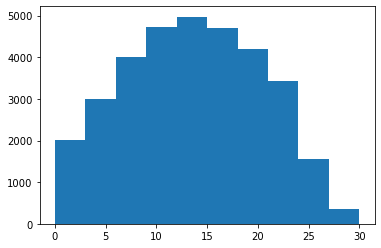

CURRENT
count    1140.000000
mean       14.753509
std         6.729160
min         0.000000
25%        10.000000
50%        15.000000
75%        20.000000
max        30.000000
Name: dti, dtype: float64


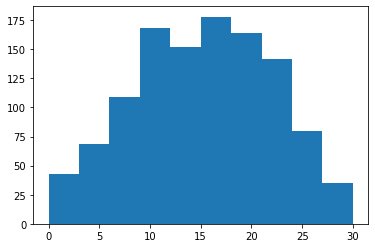

CHARGED OFF
count    5627.000000
mean       14.001599
std         6.597932
min         0.000000
25%         9.000000
50%        14.000000
75%        19.000000
max        30.000000
Name: dti, dtype: float64


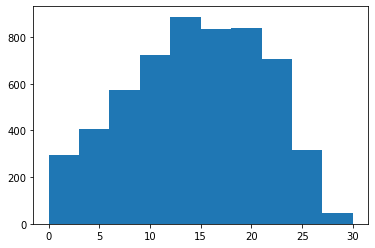

In [70]:
def printHistogramForDTI(desc, series):
    print(desc)
    print(series.describe())
    plt.hist(series)
    plt.show()
    return

printHistogramForDTI('fully paid'.upper(), dfPaidOff['dti'].round())
printHistogramForDTI('current'.upper(), dfCurrent['dti'].round())
printHistogramForDTI('charged off'.upper(), dfChargedOff['dti'].round())



In [96]:
from  matplotlib.ticker import FuncFormatter

def printHistogramForParam(desc, series):
    print(desc)
    print(series.describe())
    plt.hist(series)
    plt.show()
    return


FULLY PAID
count    3.295000e+04
mean     6.986250e+04
std      6.656225e+04
min      4.000000e+03
25%      4.113275e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


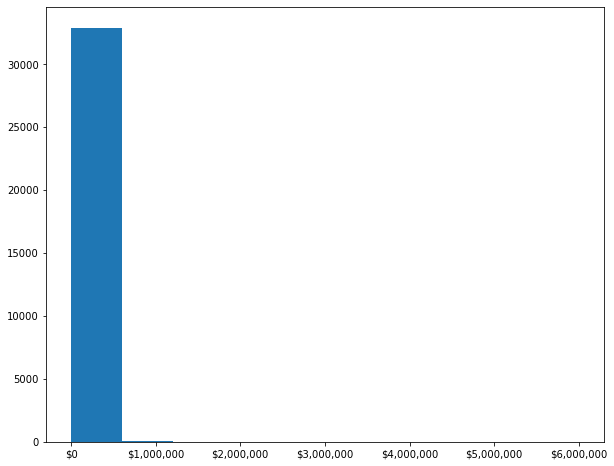

In [99]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))
printHistogramForDTI('fully paid'.upper(), dfPaidOff['annual_inc'].round())

CURRENT
count      1140.000000
mean      75430.665789
std       46775.431245
min        9960.000000
25%       47475.000000
50%       65000.000000
75%       90000.000000
max      650000.000000
Name: annual_inc, dtype: float64


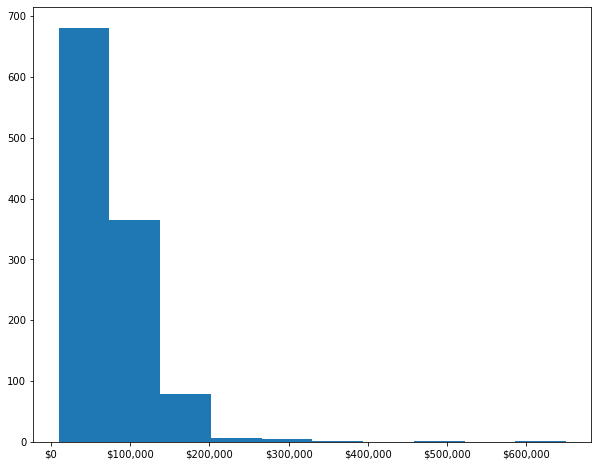

In [100]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))
printHistogramForDTI('current'.upper(), dfCurrent['annual_inc'].round())

CHARGED OFF
count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64


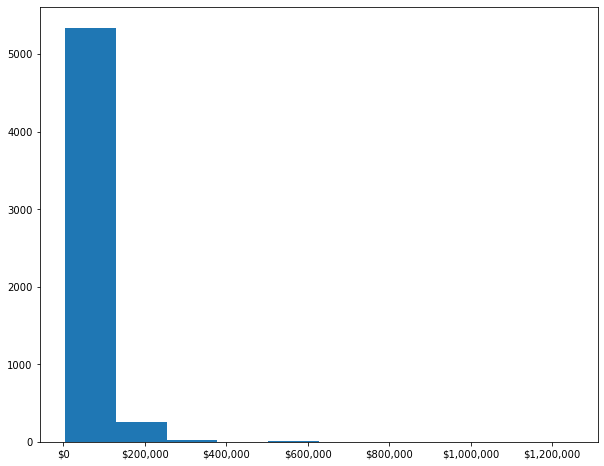

In [101]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))
printHistogramForDTI('charged off'.upper(), dfChargedOff['annual_inc'].round())

In [103]:
#We have to categorize the annual income to slabs, derive new column and then run this
#Say 50K bands until 500K and then above 500K
#THIS WOULD RUN INFINITELY
#rrr = pd.pivot_table(data=df, index=["annual_inc"], columns="loan_status_lower")
#rrr.plot(kind="bar", figsize=[10,8])

#plt.show()


### Installment

FULLY PAID
count    32950.000000
mean       320.130197
std        207.076314
min         16.000000
25%        165.000000
50%        276.000000
75%        421.000000
max       1295.000000
Name: installment, dtype: float64


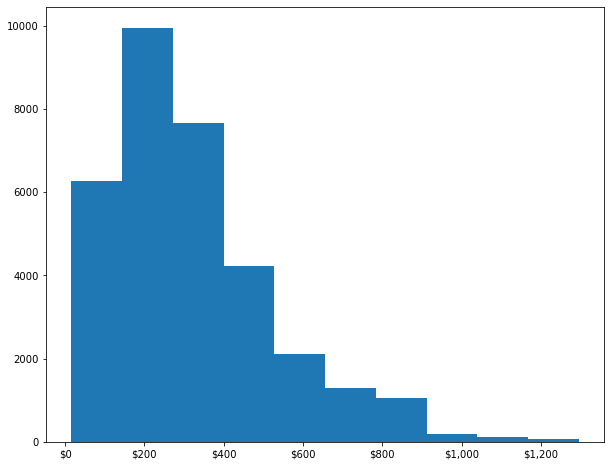

In [155]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))
printHistogramForDTI('fully paid'.upper(), dfPaidOff['installment'].round())

CURRENT
count    1140.000000
mean      395.486842
std       204.497926
min        22.000000
25%       258.000000
50%       368.000000
75%       520.000000
max       981.000000
Name: installment, dtype: float64


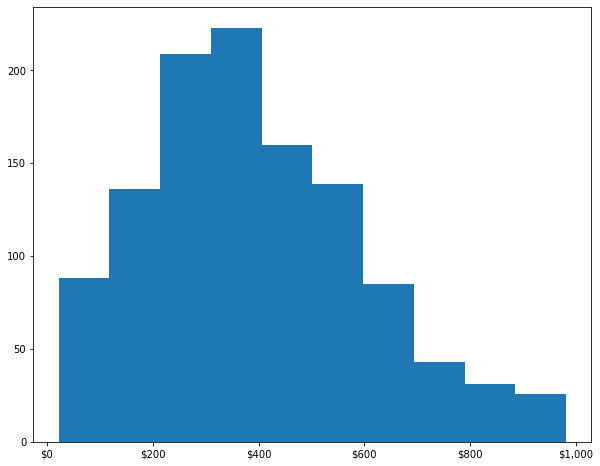

In [156]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))
printHistogramForDTI('current'.upper(), dfCurrent['installment'].round())

CHARGED OFF
count    5627.000000
mean      336.172028
std       217.054577
min        23.000000
25%       168.500000
50%       294.000000
75%       458.000000
max      1305.000000
Name: installment, dtype: float64


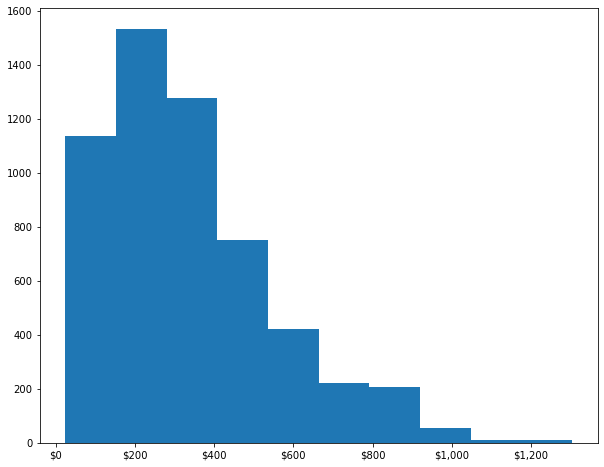

In [157]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))
printHistogramForDTI('charged off'.upper(), dfChargedOff['installment'].round())

In [111]:
from  matplotlib.ticker import FuncFormatter

def printHistogramForNonNumericParam(desc, series):
    print(desc)
    print(series.describe())
    plt.hist(series)
    plt.show()
    return

CHARGED OFF
count             5627
unique               3
top       not verified
freq              2142
Name: verification_status_lower, dtype: object


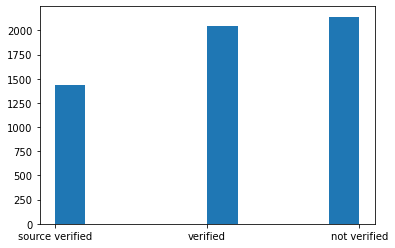

FULLY PAID
count            32950
unique               3
top       not verified
freq             14552
Name: verification_status_lower, dtype: object


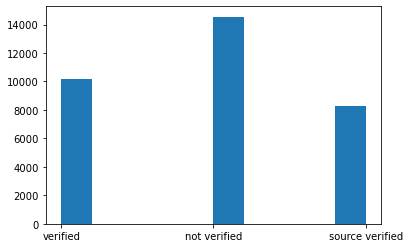

CURRENT
count         1140
unique           3
top       verified
freq           603
Name: verification_status_lower, dtype: object


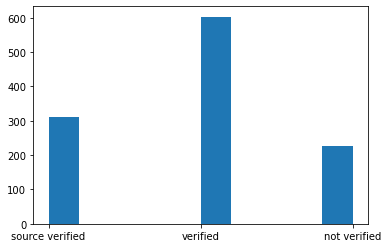

In [113]:
printHistogramForNonNumericParam('charged off'.upper(), dfChargedOff['verification_status_lower'])
printHistogramForNonNumericParam('fully paid'.upper(), dfPaidOff['verification_status_lower'])
printHistogramForNonNumericParam('current'.upper(), dfCurrent['verification_status_lower'])

TypeError: inner() got multiple values for argument 'ax'

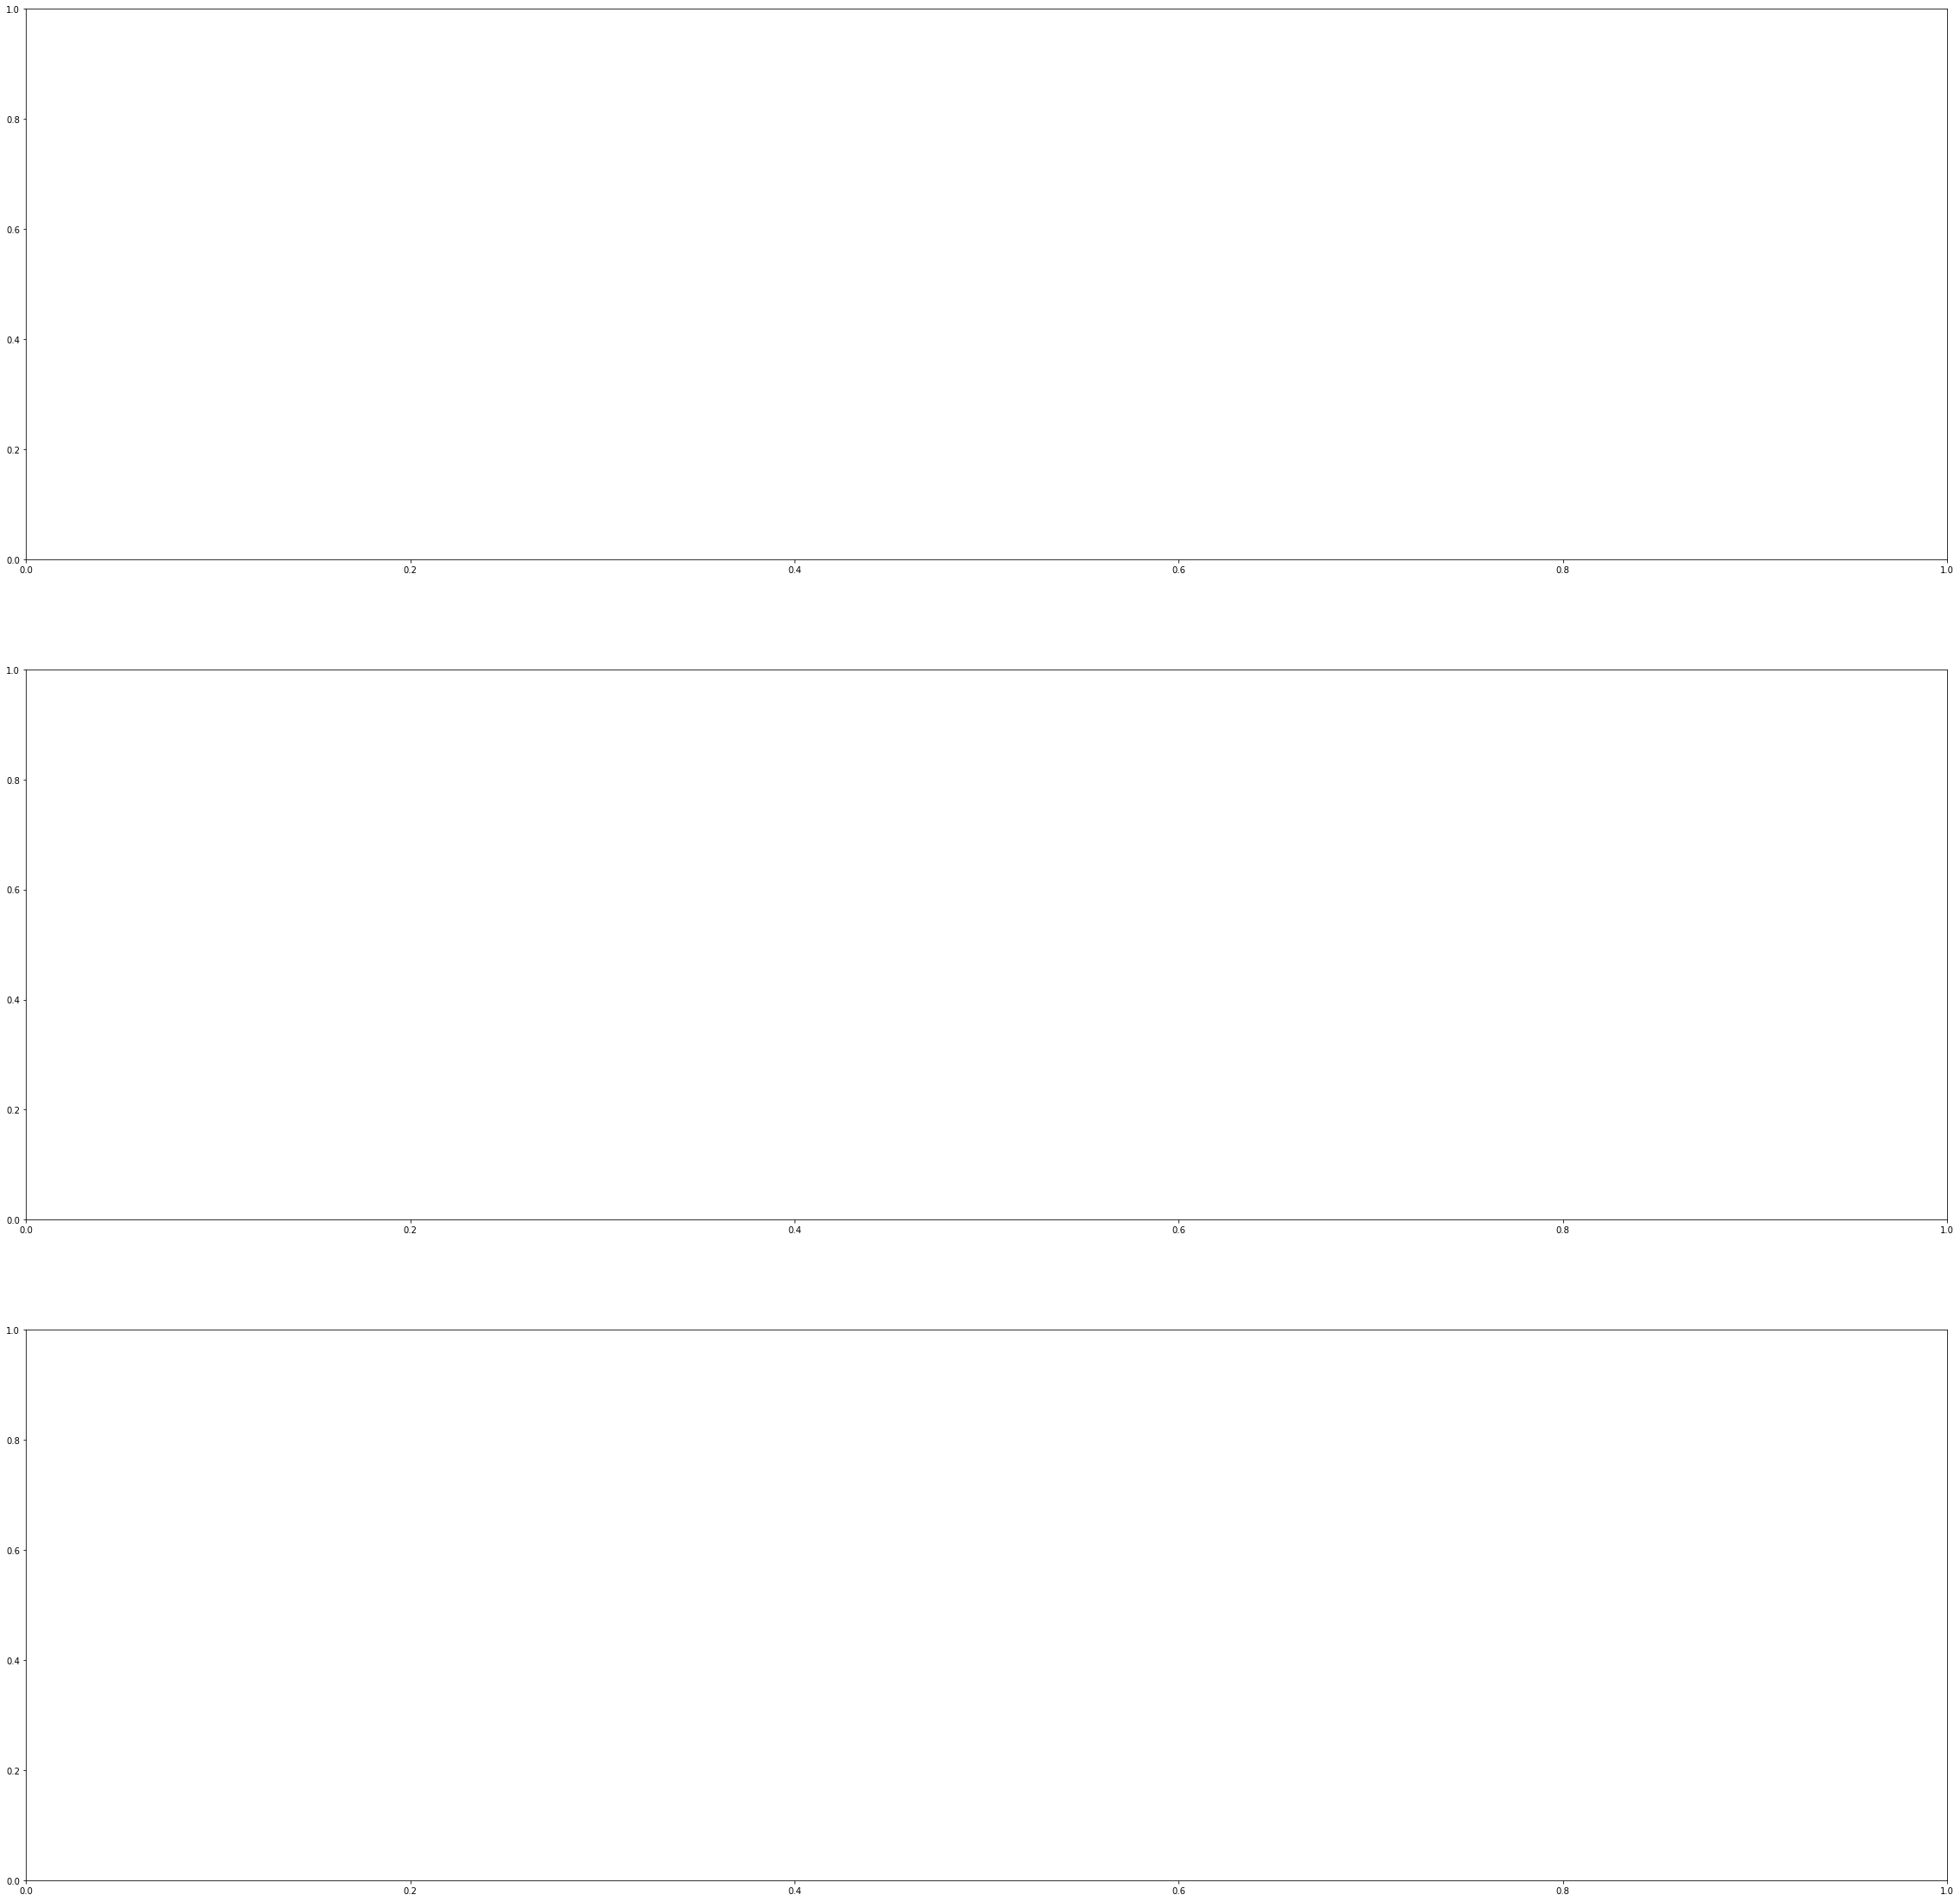

In [145]:
fig, ax = plt.subplots(3, 1, figsize=(40,40))

paidOff = df['loan_status_lower'] == 'fully paid'
current = df['loan_status_lower'] == 'current'
chargedOff = df['loan_status_lower'] == 'charged off'

dfPaidOff = df.loc[paidOff]
dfCurrent = df.loc[current]
dfChargedOff = df.loc[chargedOff]

# Lets draw the distribution plot for the above subsets
plt.hist(dfPaidOff['annual_inc'], ax=ax[0], color='red')
plt.hist(dfCurrent['annual_inc'], ax=ax[1], color='green')
plt.hist(dfChargedOff['annual_inc'], ax=ax[2], color='blue')

# Lets set the title for each plots
ax[0].set_title("The listed amount of the loan applied for by the borrower", fontsize=14)
ax[1].set_title("The total amount committed to that loan", fontsize=14)
ax[2].set_title("The total amount committed by investors for that loan.", fontsize=14)


No handles with labels found to put in legend.


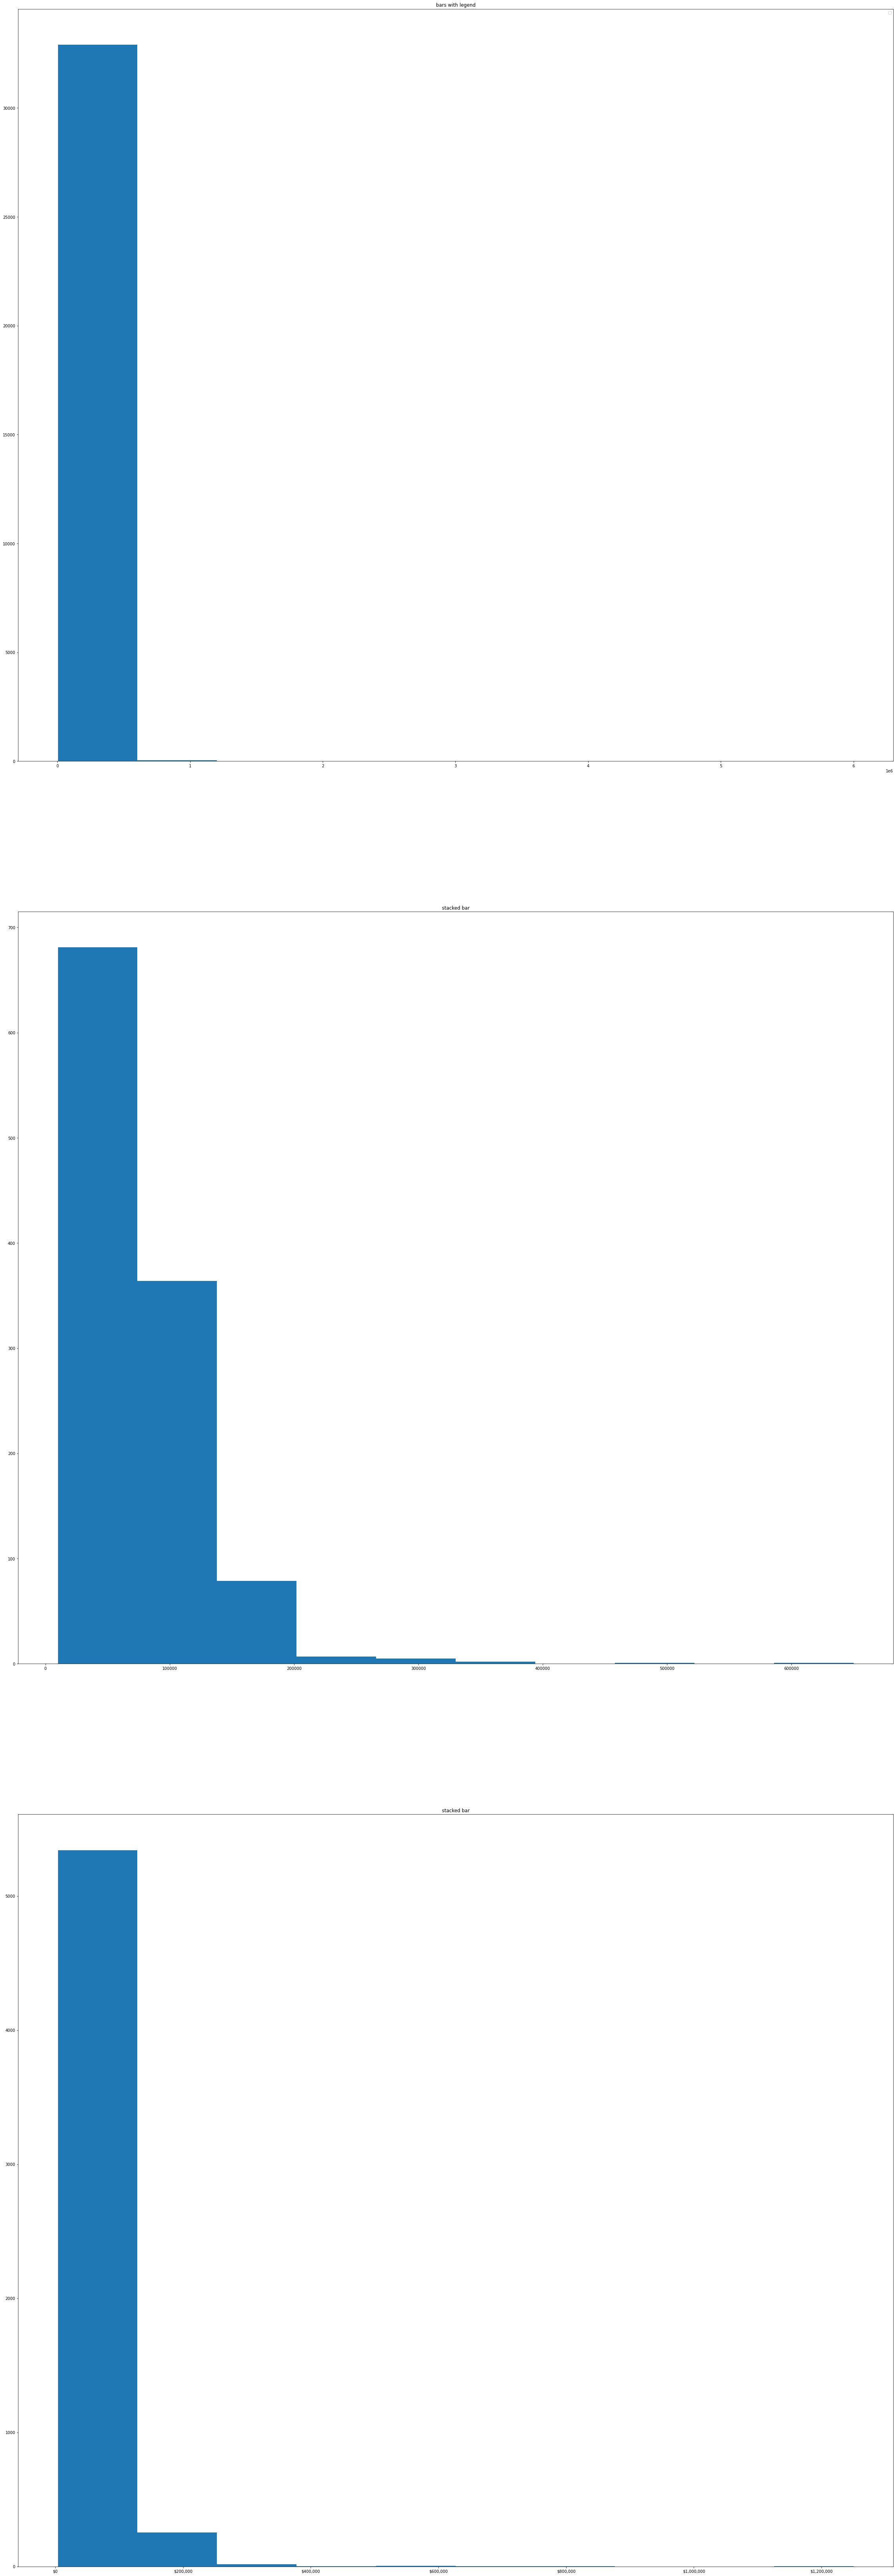

In [154]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(40,120))
ax0, ax1, ax2 = axes.flatten()


paidOff = df['loan_status_lower'] == 'fully paid'
current = df['loan_status_lower'] == 'current'
chargedOff = df['loan_status_lower'] == 'charged off'

dfPaidOff = df.loc[paidOff]
dfCurrent = df.loc[current]
dfChargedOff = df.loc[chargedOff]

# Lets draw the distribution plot for the above subsets
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:0,.0f}'.format(x)))

colors = ['red', 'tan', 'lime']
ax0.hist(dfPaidOff['annual_inc'], histtype='bar')
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(dfCurrent['annual_inc'], histtype='bar')
ax1.set_title('stacked bar')

ax2.hist(dfChargedOff['annual_inc'], histtype='bar')
ax2.set_title('stacked bar')

#ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
#ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
#ax3.hist(x_multi, n_bins, histtype='bar')
#ax3.set_title('different sample sizes')

plt.show()

### EMI as a percent of Monthly income

In [171]:
df[['emi_income_percent', 'installment', 'annual_inc']]

,emi_income_percent,installment,annual_inc
id,,,
1077501,8.143500,162.87,24000.0
1077430,2.393200,59.83,30000.0
1077175,8.259549,84.33,12252.0
1076863,8.275854,339.31,49200.0
1075358,1.016850,67.79,80000.0
...,...,...,...
92187,0.855491,78.42,110000.0
90665,18.358667,275.38,18000.0
90395,1.882080,156.84,100000.0


FULLY PAID
count    32950.000000
mean         6.423308
std          3.949081
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         32.000000
Name: emi_income_percent, dtype: float64


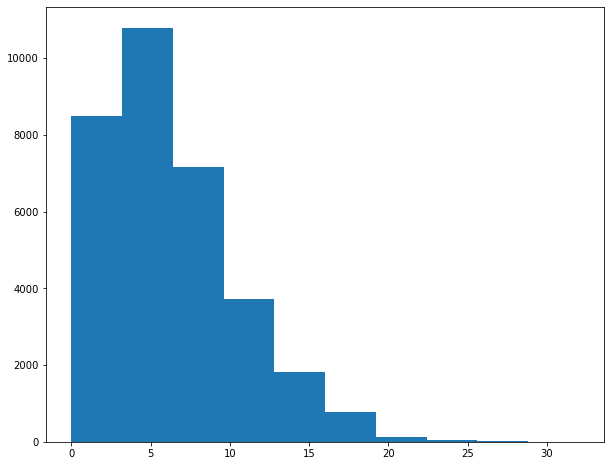

CURRENT
count    1140.000000
mean        7.188596
std         3.716283
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        24.000000
Name: emi_income_percent, dtype: float64


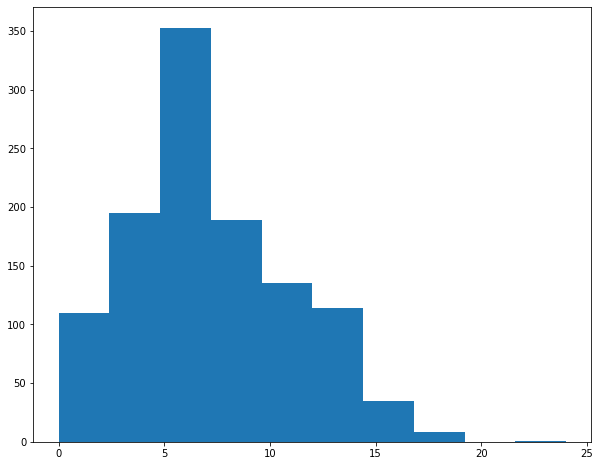

CHARGED OFF
count    5627.000000
mean        7.367691
std         4.310724
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        30.000000
Name: emi_income_percent, dtype: float64


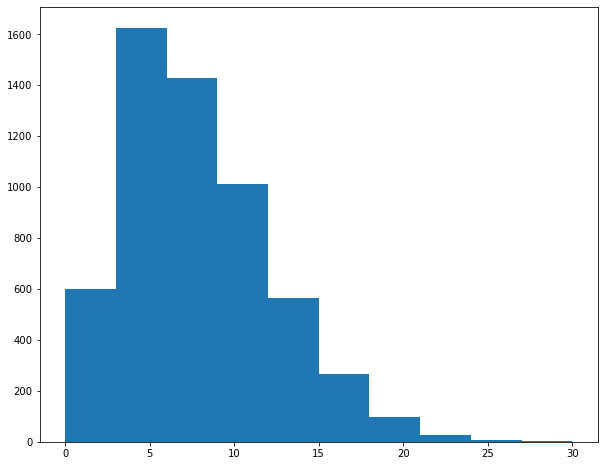

In [172]:
plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:0,.0f}'.format(x)))
printHistogramForDTI('fully paid'.upper(), dfPaidOff['emi_income_percent'].round())

plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:0,.0f}'.format(x)))
printHistogramForDTI('current'.upper(), dfCurrent['emi_income_percent'].round())

plt.figure(figsize=[10,8])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:0,.0f}'.format(x)))
printHistogramForDTI('charged off'.upper(), dfChargedOff['emi_income_percent'].round())

In [176]:
len(df['member_id'].unique())

39717

CHARGED OFF
count                   5627
unique                    14
top       debt_consolidation
freq                    2767
Name: purpose_lower, dtype: object


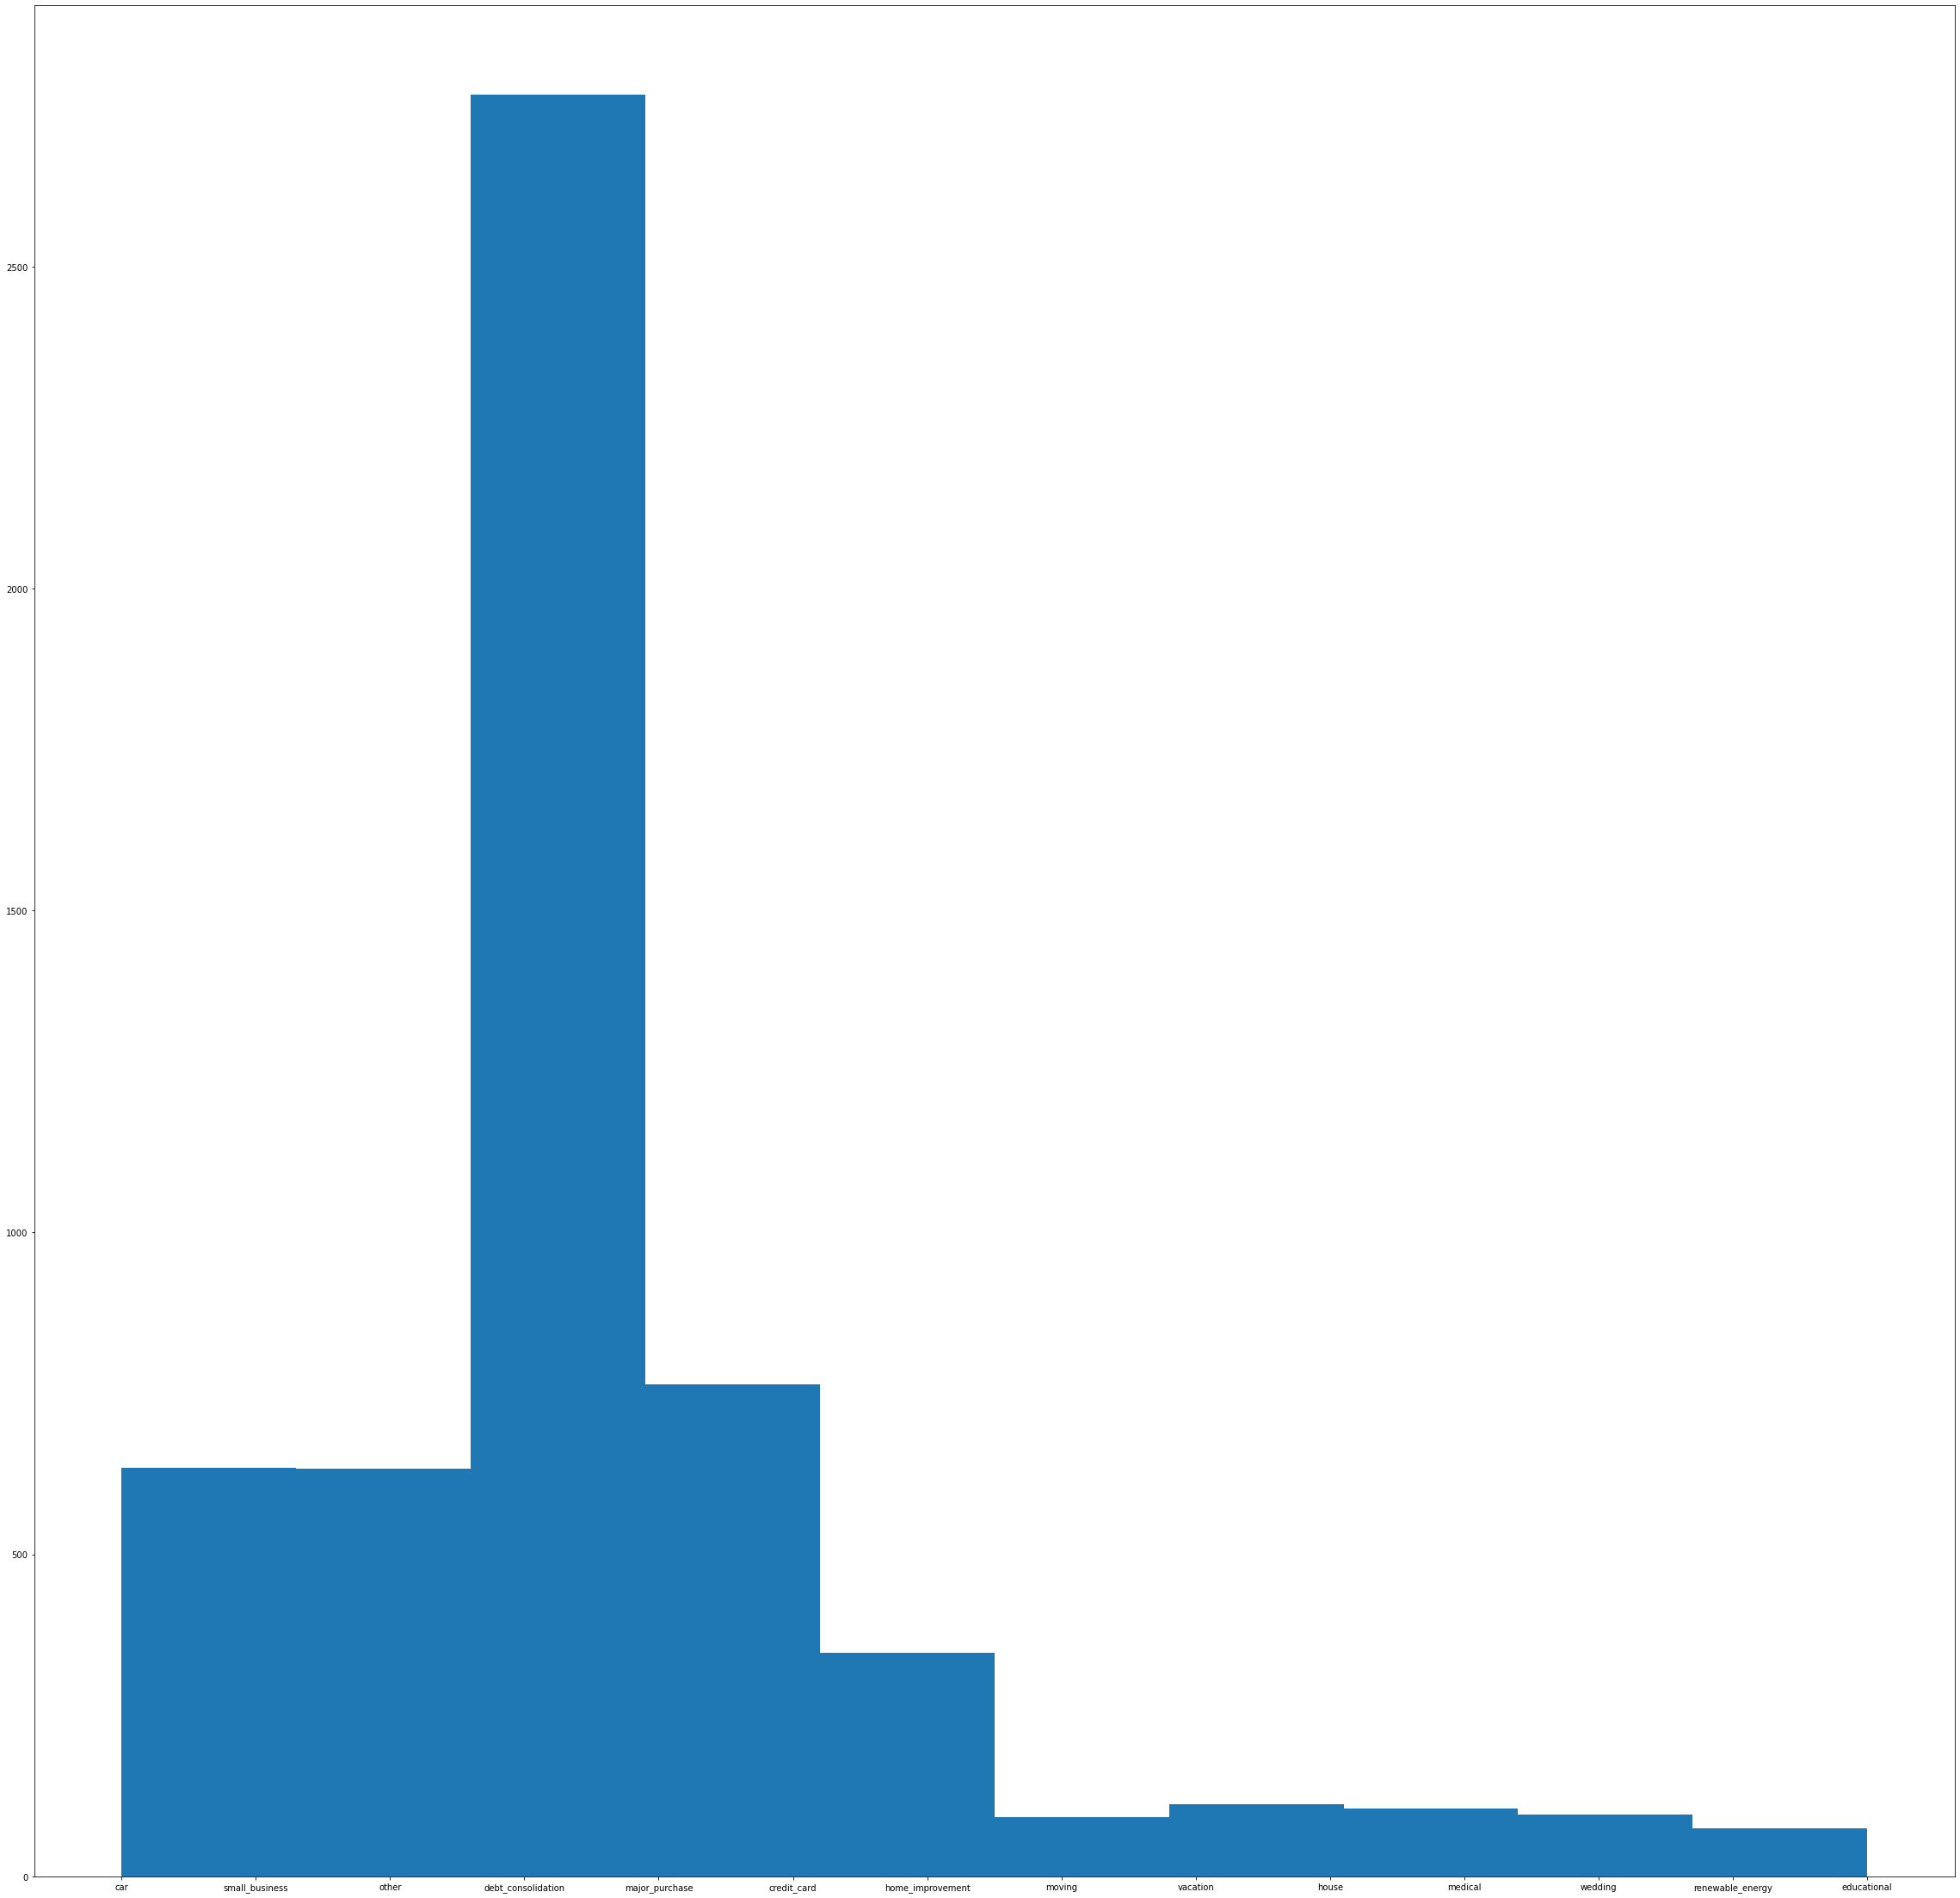

FULLY PAID
count                  32950
unique                    14
top       debt_consolidation
freq                   15288
Name: purpose_lower, dtype: object


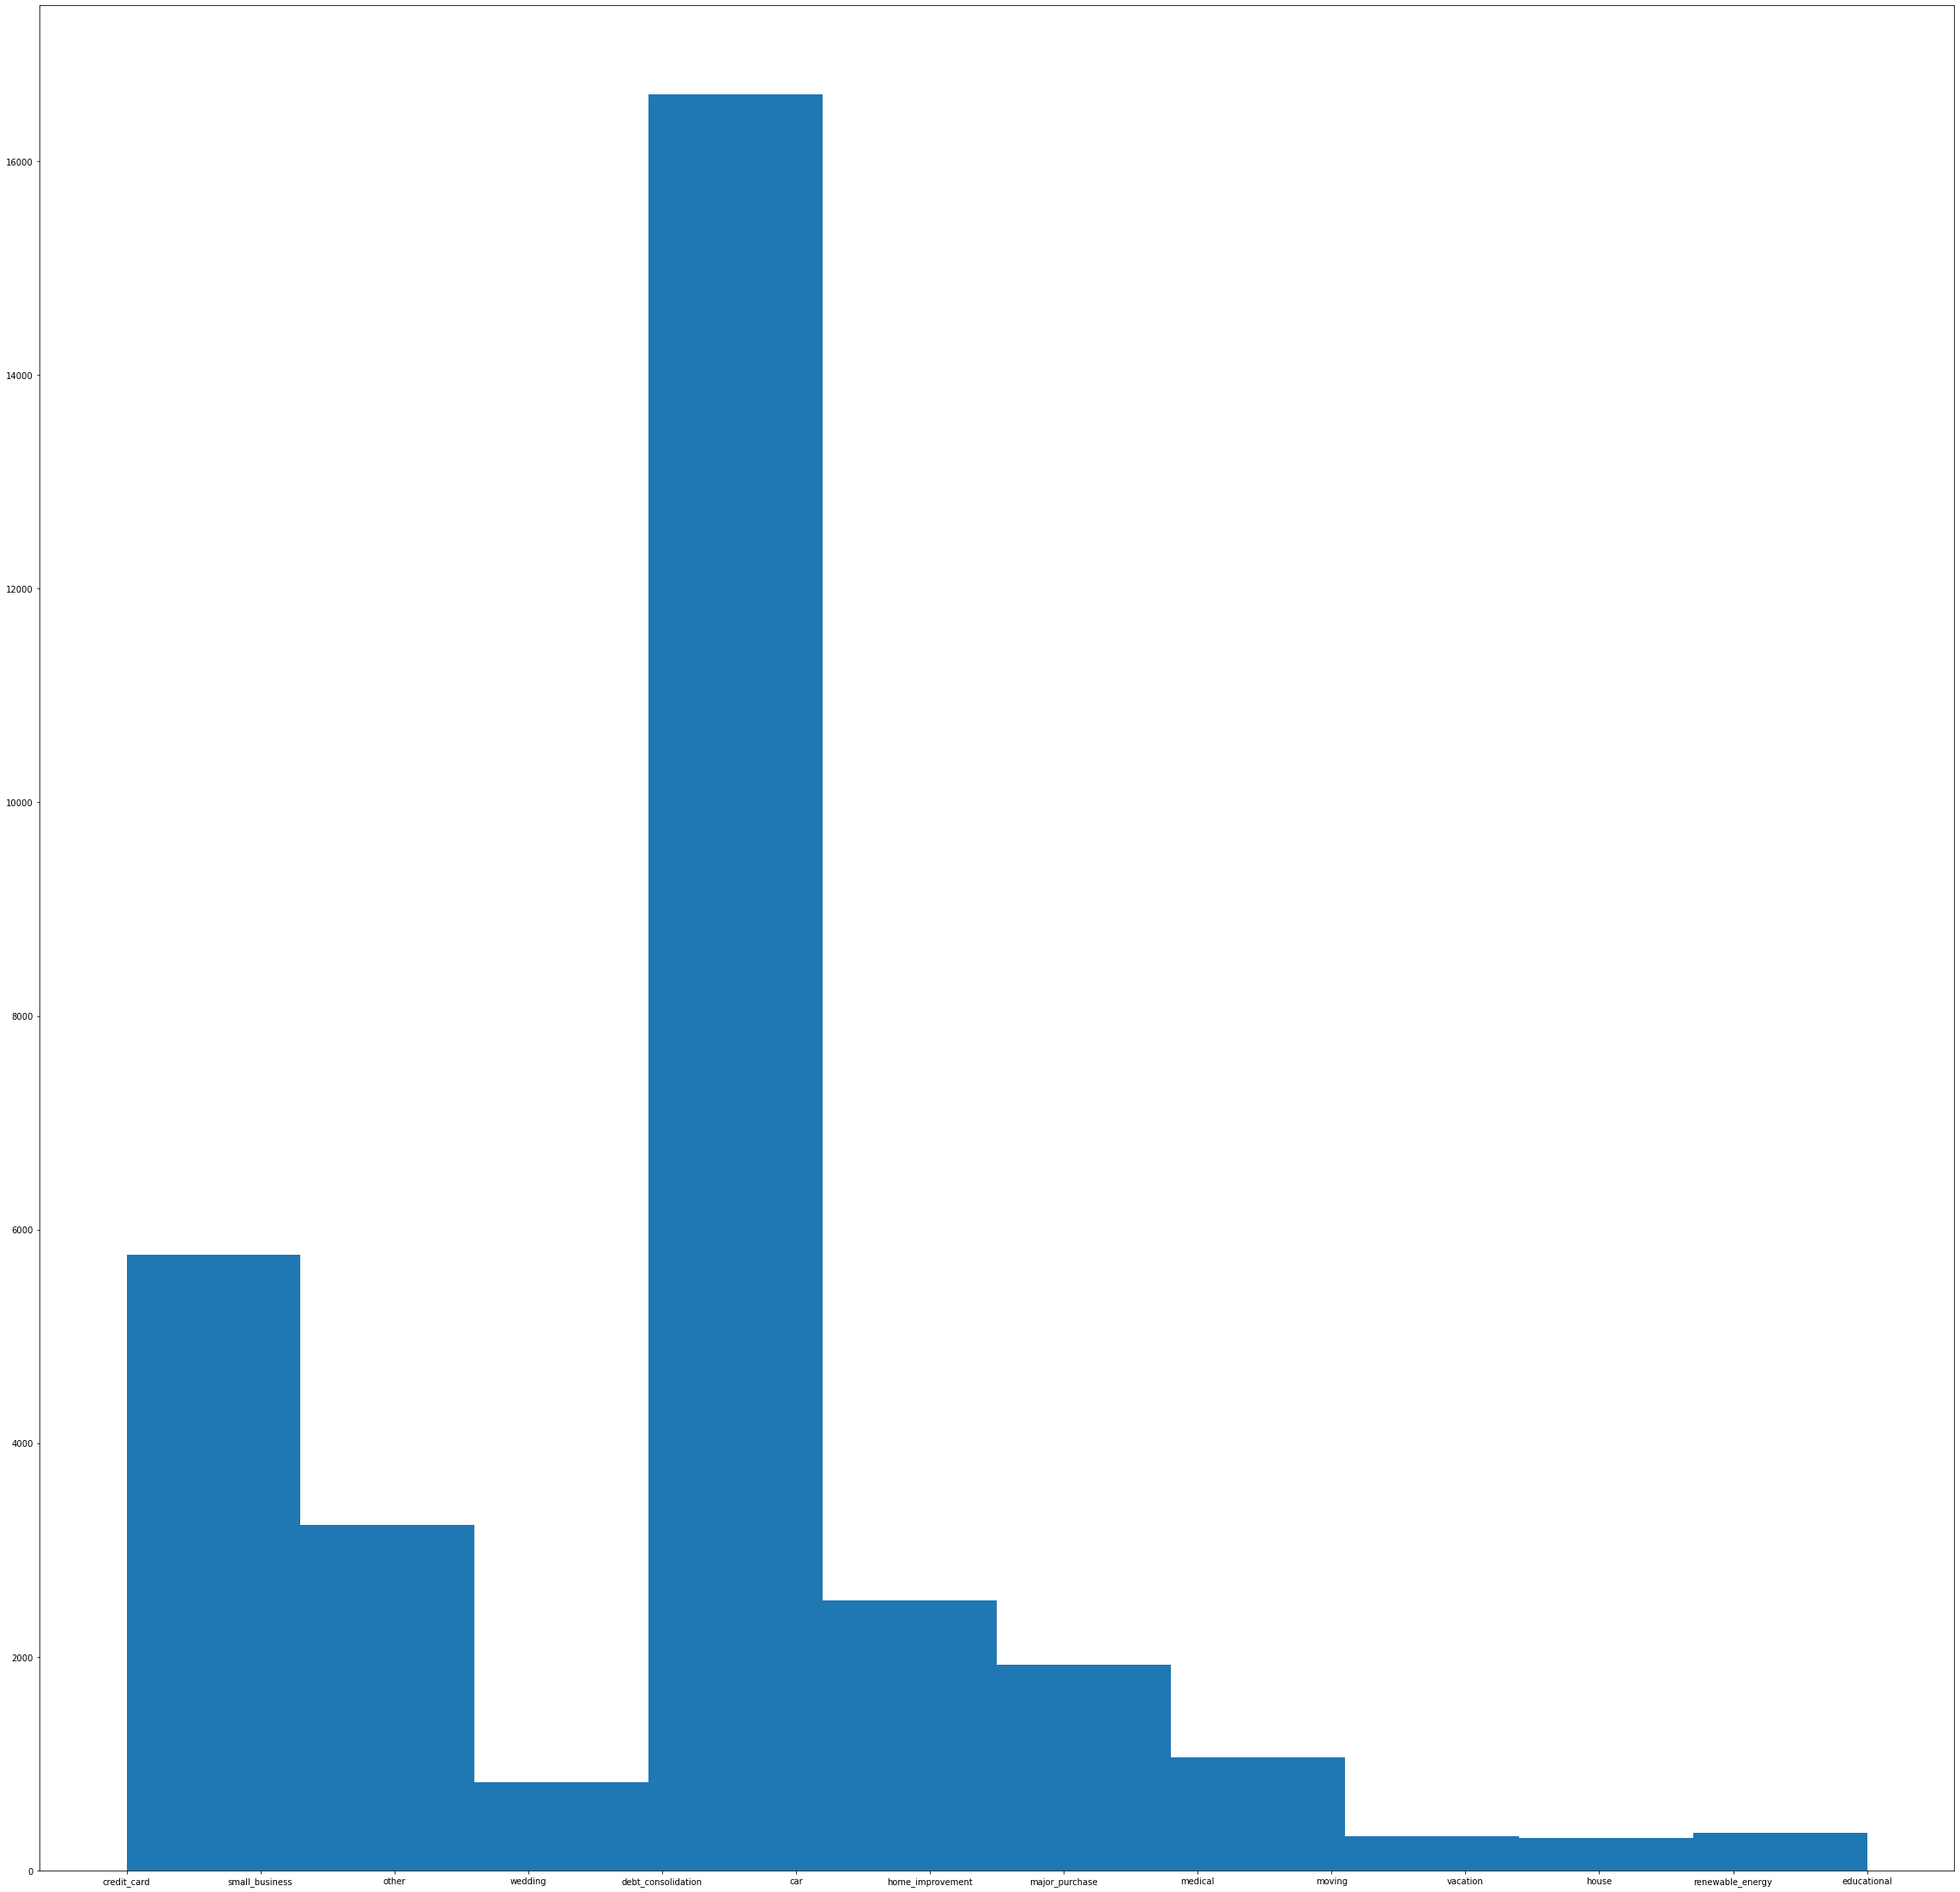

CURRENT
count                   1140
unique                    13
top       debt_consolidation
freq                     586
Name: purpose_lower, dtype: object


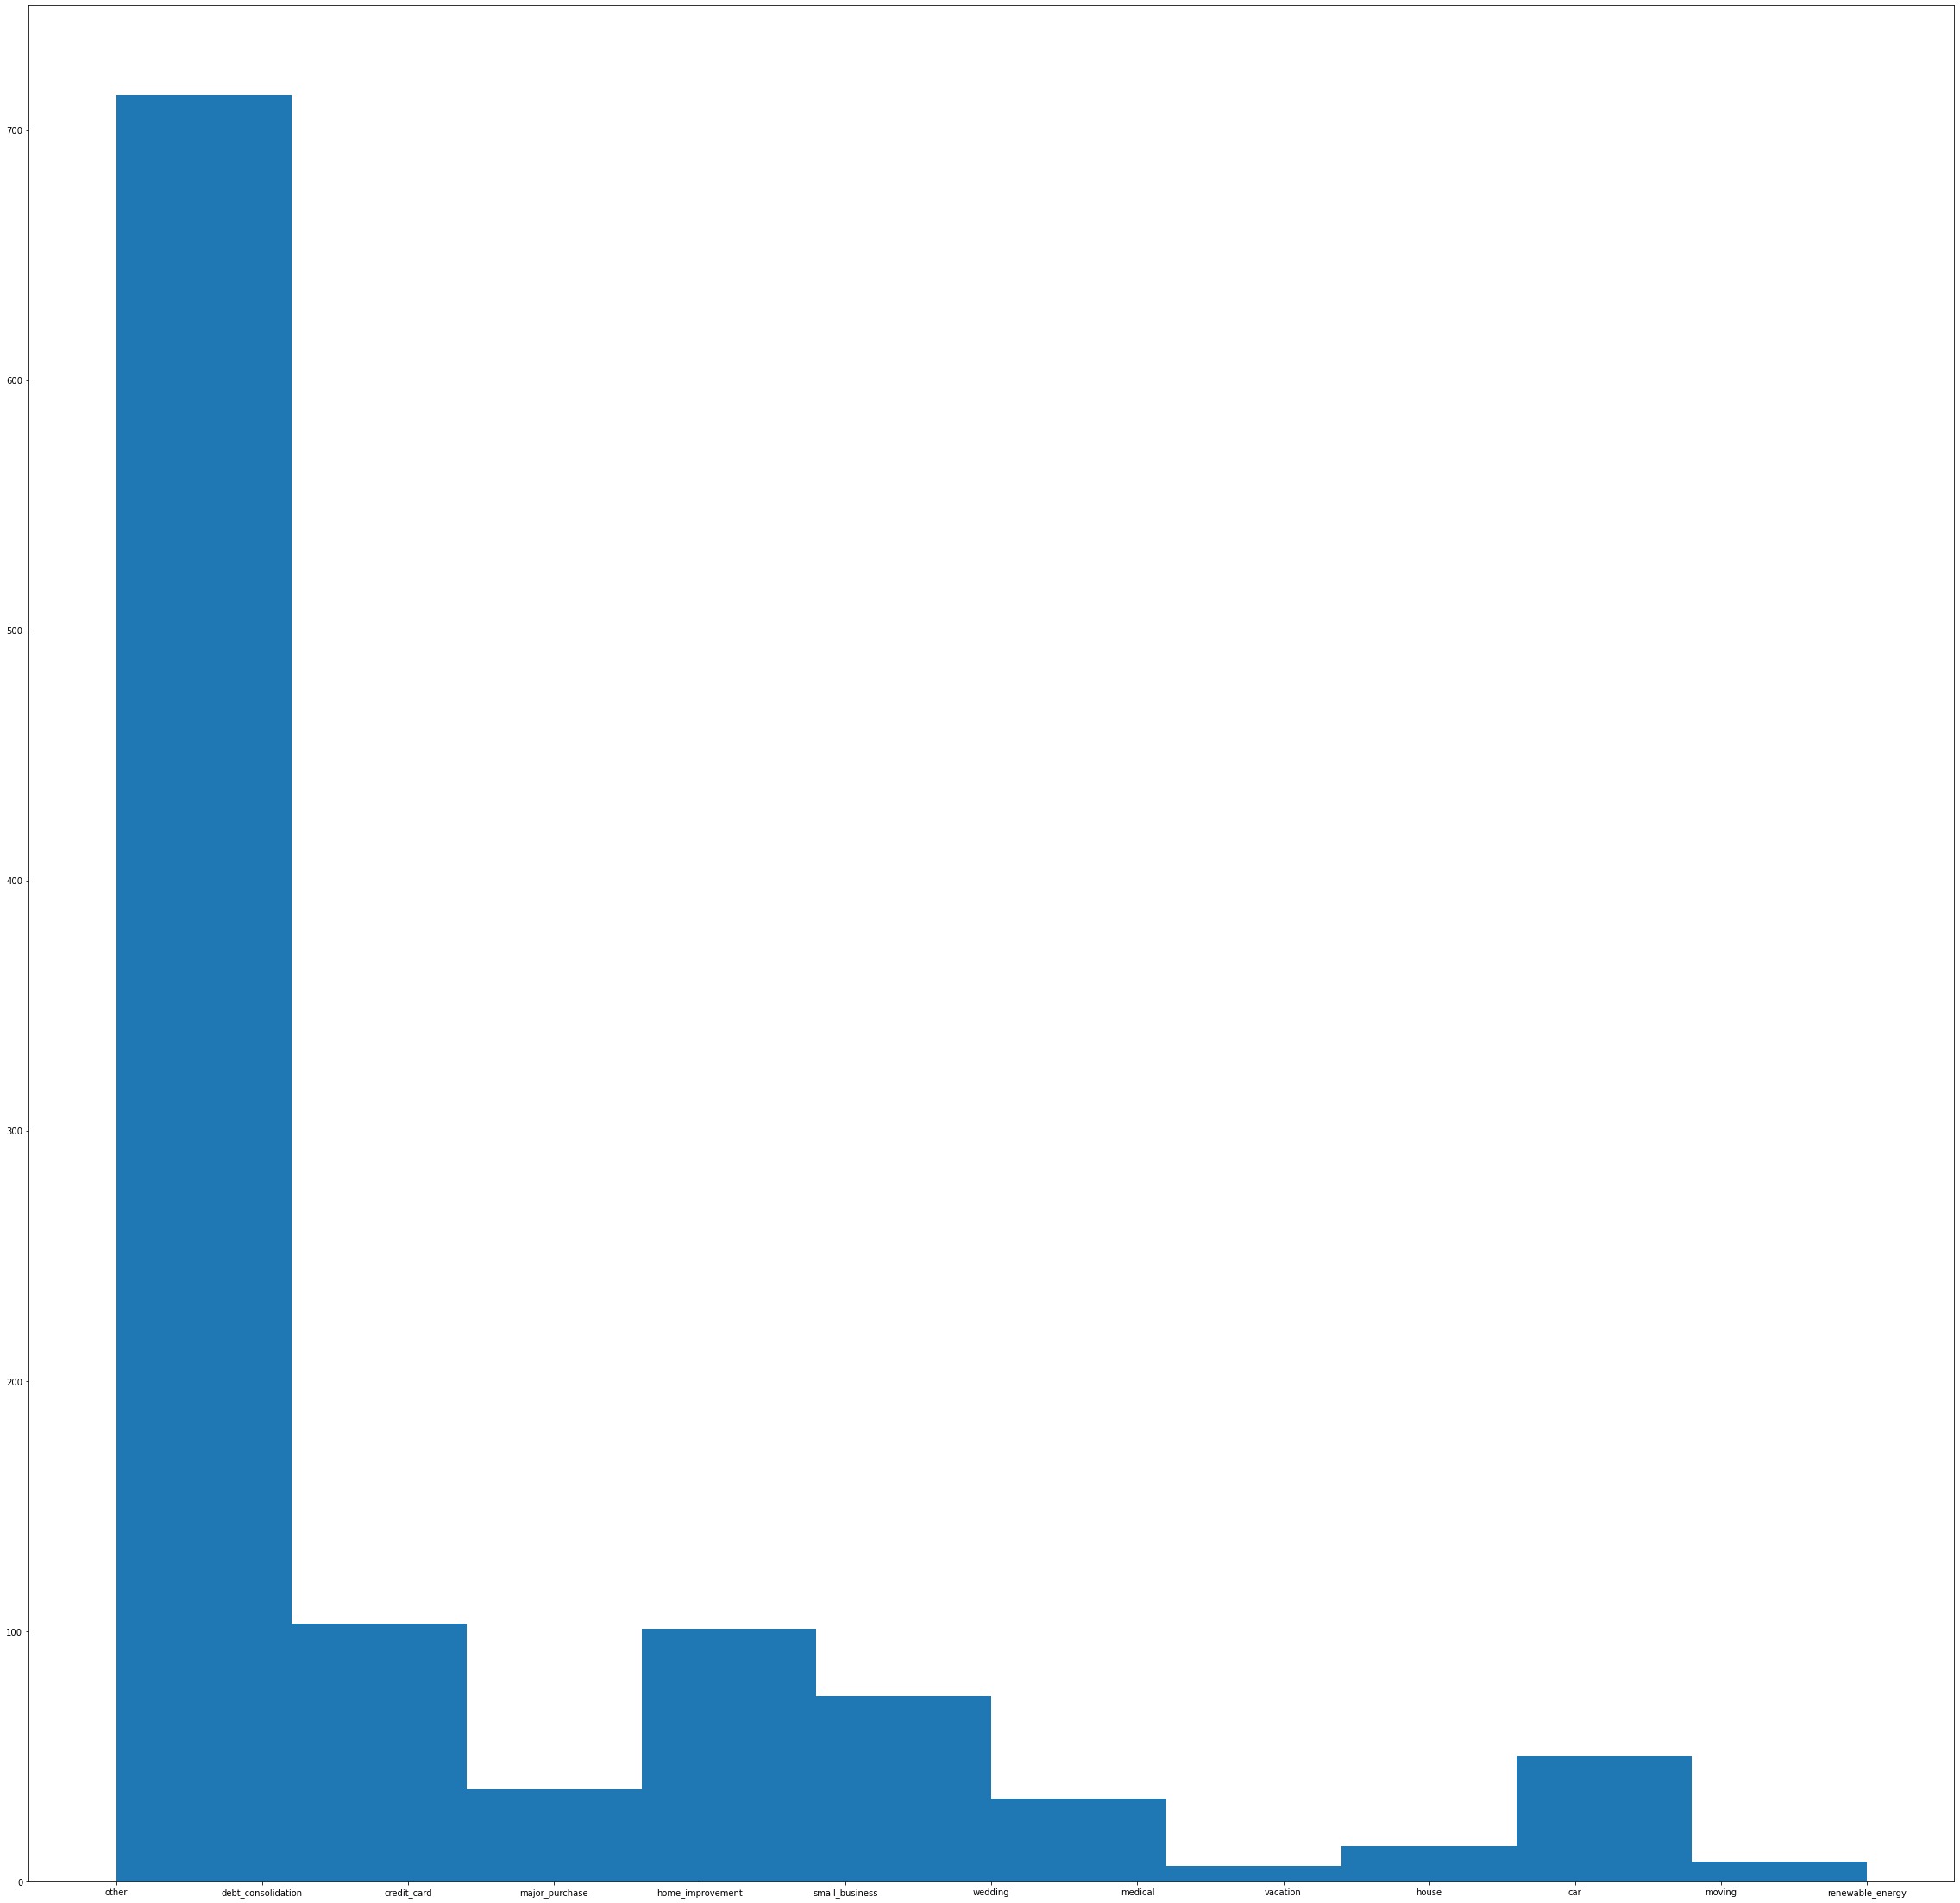

In [189]:


def printHoriHistogramForParam(desc, series):
    print(desc)
    print(series.describe())
    plt.hist(series)
    plt.show()
    return

plt.figure(figsize=[40,40])
printHoriHistogramForParam('charged off'.upper(), dfChargedOff['purpose_lower'])

plt.figure(figsize=[40,40])
printHoriHistogramForParam('fully paid'.upper(), dfPaidOff['purpose_lower'])

plt.figure(figsize=[40,40])
printHoriHistogramForParam('current'.upper(), dfCurrent['purpose_lower'])




In [199]:
plt.figure(figsize=[40,40])
#printHoriHistogramForParam('charged off'.upper(), dfChargedOff['title_lower'])

#plt.figure(figsize=[40,40])
printHoriHistogramForParam('fully paid'.upper(), dfPaidOff['title_lower'])

#plt.figure(figsize=[40,40])
#printHoriHistogramForParam('current'.upper(), dfCurrent['title_lower'])


FULLY PAID
count                  32950
unique                 15261
top       debt consolidation
freq                    2473
Name: title_lower, dtype: object


KeyboardInterrupt: 

## Lets see the frequency of loan in different regions of the country
  **By analysing the different regions and loan amount we got to know that far_west region has received maximun loan.**

In [200]:
# lets see the details of employement
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   member_id                  39717 non-null  int64  
 1   loan_amnt                  39717 non-null  int64  
 2   funded_amnt                39717 non-null  int64  
 3   funded_amnt_inv            39717 non-null  float64
 4   term                       39717 non-null  object 
 5   int_rate                   39717 non-null  float64
 6   installment                39717 non-null  float64
 7   grade                      39717 non-null  object 
 8   sub_grade                  39717 non-null  object 
 9   emp_title                  37258 non-null  object 
 10  emp_length                 38642 non-null  object 
 11  home_ownership             39717 non-null  object 
 12  annual_inc                 39717 non-null  float64
 13  verification_status        39717 non-nul

In [201]:
# Lets do the data impuation for emp_title and emp_length columns
df.emp_title = df.emp_title.fillna(df.emp_title.mode()[0])
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Loan_Month,loan_status_lower,verification_status_lower,emi_income_percent,purpose_lower,title_lower
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,10.65,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,DEC,fully paid,verified,8.143500,credit_card,computer
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,15.27,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,DEC,charged off,source verified,2.393200,car,bike
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,15.96,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,DEC,fully paid,not verified,8.259549,small_business,real estate business
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,13.49,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,DEC,fully paid,source verified,8.275854,other,personel
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,12.69,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,DEC,current,source verified,1.016850,other,personal


In [202]:
# Create a new column to categorize the income
df['inc_category']= np.nan
lst =[df]
for col in lst:
    col.loc[col['annual_inc'] <= 25000, 'inc_category'] = 'Low'
    col.loc[(col['annual_inc'] > 25000) & (col['annual_inc'] <= 50000), 'inc_category'] = 'Medium'
    col.loc[col['annual_inc'] > 50000, 'inc_category'] = 'High'
df.head()   

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Loan_Month,loan_status_lower,verification_status_lower,emi_income_percent,purpose_lower,title_lower,inc_category
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,10.65,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,DEC,fully paid,verified,8.143500,credit_card,computer,Low
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,15.27,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,DEC,charged off,source verified,2.393200,car,bike,Medium
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,15.96,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,DEC,fully paid,not verified,8.259549,small_business,real estate business,Low
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,13.49,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,DEC,fully paid,source verified,8.275854,other,personel,Medium
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,12.69,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,DEC,current,source verified,1.016850,other,personal,High


In [203]:
# Lets check the details of addr_state
print(df.addr_state.unique())

# lets create Region column depedning on the state column value
# I have taken data from Google and wiki pages
Far_West = ['CA','HI', 'NV']
Great_Lakes = ['IL','IN','MI','MN','OH','WI']
Midsouth=['DE','KY','MD' ,'NC' ,'TN', 'VA', 'WV']
Midwest= ['IA','AR', 'MO','NE', 'ND', 'SD']
Mountain_West =['AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY']
New_England = ['CT','ME', 'MA', 'NH', 'RI', 'VT']
Northeast = ['NJ','NY','PA']
Northwest = ['OR', 'WA']
South_Central = ['AR', 'LA','OK','TX']
Southeast = ['AL','FL','GA','MS','SC','PR']
df['Region']= np.nan

def map_region(state):
    if state in Far_West:
        return 'Far_West'
    elif state in Great_Lakes:
        return 'Great_Lakes'
    elif state in Midsouth:
        return 'Midsouth'
    elif state in Midwest:
        return 'Midwest'
    elif state in Mountain_West:
        return 'Mountain_West'
    elif state in New_England:
        return 'New_England'
    elif state in Northeast:
        return 'Northeast'
    elif state in South_Central:
        return 'South_Central'
    elif state in Southeast:
        return 'Southeast'
    elif state in Northwest:
        return 'Northwest'
df['Region'] = df['addr_state'].apply(map_region)
df.head()

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Loan_Month,loan_status_lower,verification_status_lower,emi_income_percent,purpose_lower,title_lower,inc_category,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,10.65,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,DEC,fully paid,verified,8.143500,credit_card,computer,Low,Mountain_West
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,15.27,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,DEC,charged off,source verified,2.393200,car,bike,Medium,Southeast
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,15.96,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,DEC,fully paid,not verified,8.259549,small_business,real estate business,Low,Great_Lakes
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,13.49,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,DEC,fully paid,source verified,8.275854,other,personel,Medium,Far_West
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,12.69,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,DEC,current,source verified,1.016850,other,personal,High,Northwest


In [204]:
# Lets create a loan_group df to see the insights
Loan_group = df.groupby(['Loan_Month','Region'], as_index=False).sum()
Loan_group.loan_amnt = Loan_group.loan_amnt/1000
Loan_group.head()

,Loan_Month,Region,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,emi_income_percent
0,APR,Far_West,422918195,6056.800,5940850,5.654459e+06,6584.31,180429.17,38161216.14,7047.25,91,396,4829,30,7505632,11020,0.0,0.0,6.421507e+06,6108043.05,5233779.02,1125497.17,720.503424,61510.36,10633.8845,1396063.00,29.0,3549.405106
1,APR,Great_Lakes,268165474,3664.575,3616125,3.405142e+06,4148.98,108184.98,21952464.53,4885.02,51,407,3443,29,4311606,8142,0.0,0.0,3.901804e+06,3669078.42,3160756.93,696925.37,274.526191,43846.75,5121.2003,806138.23,25.0,2414.425533
2,APR,Midsouth,228044857,3305.700,3238200,3.084790e+06,3402.17,94912.51,20465531.46,3904.38,51,233,2700,18,4049457,6578,0.0,0.0,3.663482e+06,3483053.63,2968439.23,667119.19,625.760862,27297.78,5247.1767,754440.28,10.0,1815.206239
3,APR,Midwest,55632085,669.375,664950,6.275524e+05,864.16,19123.01,4376162.40,992.36,12,68,690,7,687343,1770,0.0,0.0,7.450382e+05,720071.38,606510.91,134470.49,15.000000,4041.80,534.8782,217153.84,5.0,428.691706
4,APR,Mountain_West,128375023,1718.300,1692950,1.568393e+06,2042.78,51452.82,10835166.56,2190.18,24,153,1547,12,1822155,3843,0.0,0.0,1.816920e+06,1695622.75,1506238.47,306060.45,190.616575,4430.75,695.9300,426760.13,10.0,1166.533931


Text(0.5, 1.0, 'Region wise Loan Issued')

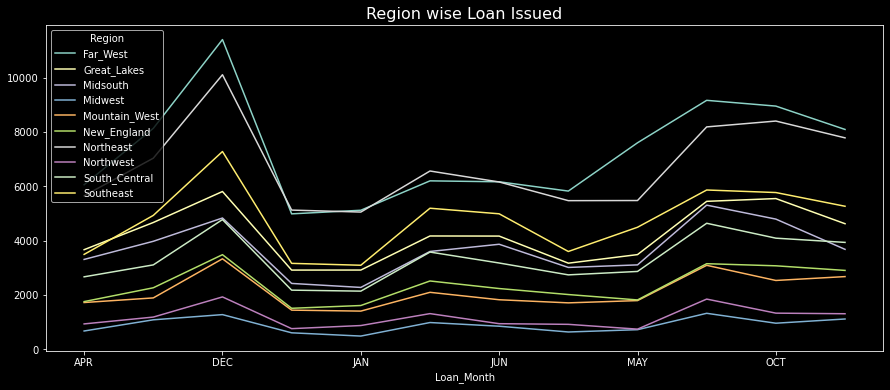

In [205]:
# lets plot the graph to see correlation
plt.style.use("dark_background")
cmap = plt.cm.Set3
df_dates = pd.DataFrame(data=Loan_group[['Loan_Month','Region','loan_amnt']])
by_issued_amount = df_dates.groupby(['Loan_Month', 'Region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))
plt.title('Region wise Loan Issued', fontsize=16)

### Lets verify the dependency of employement length, anual income, interest rate, debt to income ration region wise

In [206]:
# lets standardize the empl_length column
def emp_length(val):
    return (val.replace("years","").replace("+","").replace("<","").replace("year",""))
df.emp_length=df.emp_length.apply(emp_length)
df.emp_length=df.emp_length.astype(int)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Loan_Month,loan_status_lower,verification_status_lower,emi_income_percent,purpose_lower,title_lower,inc_category,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,US Army,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,10.65,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,DEC,fully paid,verified,8.143500,credit_card,computer,Low,Mountain_West
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,15.27,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,DEC,charged off,source verified,2.393200,car,bike,Medium,Southeast
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,US Army,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,15.96,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,DEC,fully paid,not verified,8.259549,small_business,real estate business,Low,Great_Lakes
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,13.49,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,DEC,fully paid,source verified,8.275854,other,personel,Medium,Far_West
1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,12.69,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,DEC,current,source verified,1.016850,other,personal,High,Northwest


In [207]:
df.emp_length.dtype

dtype('int32')

Text(0.5, 1.0, 'Average Anual income in different regions')

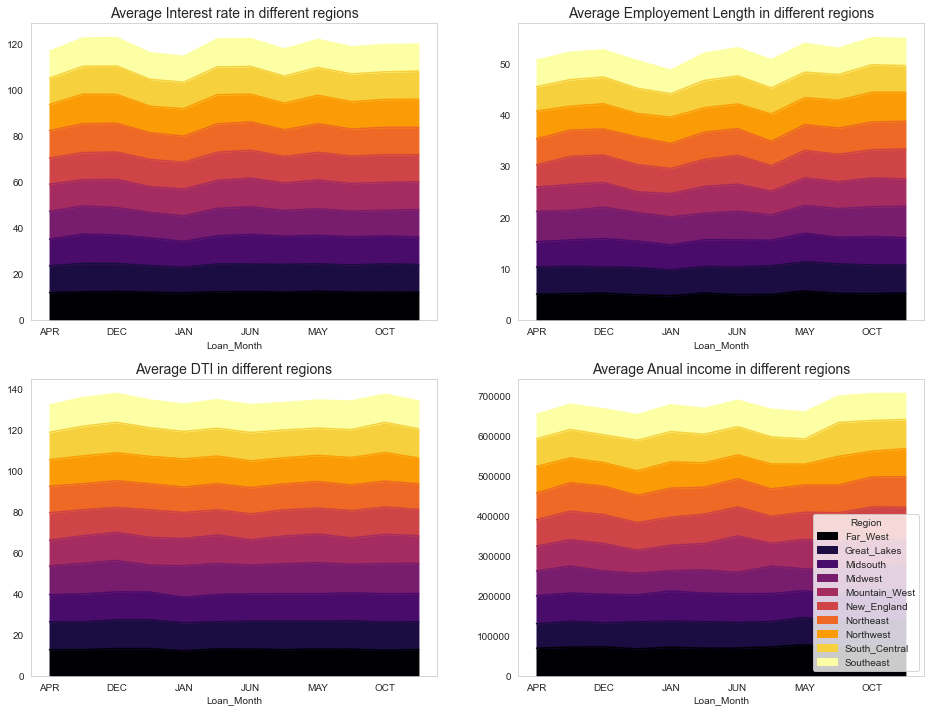

In [208]:
# lets draw the plot
sns.set_style('whitegrid')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno
by_int_rate = df.groupby(['Loan_Month', 'Region']).int_rate.mean()
by_int_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest rate in different regions', fontsize=14)

by_emp_length = df.groupby(['Loan_Month', 'Region']).emp_length.mean()
by_emp_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employement Length in different regions', fontsize=14)

by_dti = df.groupby(['Loan_Month', 'Region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average DTI in different regions', fontsize=14)

by_income = df.groupby(['Loan_Month', 'Region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Anual income in different regions', fontsize=14)



### Lets check for regionwise bad loans